<a href="https://colab.research.google.com/github/Thuan20146215/AI/blob/main/BTVN_fuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-learn
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=99ffc84b3d1fbbd8b42abe4374c7b3673f520c1b25bc67f45bb567637f7f1ce0
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [56]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline

In [63]:
Time = ctrl.Antecedent(np.arange(10,300),'Time')
Rice = ctrl.Antecedent(np.arange(100,2000),'Rice')
Power = ctrl.Consequent(np.arange(0,100),'Power')

In [67]:
Time['Very Fast']= fuzz.trimf(Time.universe,[10,10,20])
Time['Fast']= fuzz.trimf(Time.universe,[15,25,35])
Time['Average']= fuzz.trimf(Time.universe,[30,40,50])
Time['Slow']= fuzz.trimf(Time.universe,[40,65,90])
Time['Very Slow']= fuzz.trimf(Time.universe,[80,300,300])

In [69]:
Rice['Very Little']= fuzz.trimf(Rice.universe,[100,100,300])
Rice['Little']= fuzz.trimf(Rice.universe,[200,300,500])
Rice['Average']= fuzz.trimf(Rice.universe,[400,700,1000])
Rice['Much']= fuzz.trimf(Rice.universe,[800,1100,1400])
Rice['So Much']= fuzz.trimf(Rice.universe,[1200,2000,2000])

In [71]:
Power['Very Low']= fuzz.trimf(Power.universe,[0,0,50])
Power['Low']= fuzz.trimf(Power.universe,[40,50,60])
Power['Average']= fuzz.trimf(Power.universe,[50,60,70])
Power['High']= fuzz.trimf(Power.universe,[70,80,90])
Power['Very High']= fuzz.trimf(Power.universe,[80,100,100])

In [76]:
rule1 = ctrl.Rule(
  (Time['Very Slow']&Rice['Very Little'])|
  (Time['Very Slow']&Rice['Little'])|
  (Time['Slow']&Rice['Very Little']),Power['Very Low'])

In [78]:
rule2 = ctrl.Rule(
    (Time['Average']&Rice['Very Little'])|
    (Time['Very Fast']&Rice['Very Little'])|
    (Time['Slow']&Rice['Little'])|
    (Time['Average']&Rice['Little'])|
    (Time['Fast']&Rice['Little'])|
    (Time['Slow']&Rice['Average'])|
    (Time['Very Slow']&Rice['Much']),Power['Low'])

In [79]:
rule3 = ctrl.Rule(
    (Time['Fast']&Rice['Very Little'])|
    (Time['Very Slow']&Rice['Average'])|
    (Time['Average']&Rice['Average'])|
    (Time['Slow']&Rice['Much'])|
    (Time['Average']&Rice['Much'])|
    (Time['Very Slow']&Rice['So Much'])|
    (Time['Slow']&Rice['So Much']),Power['Average'])

In [80]:
rule4 = ctrl.Rule(
    (Time['Very Fast']&Rice['Little'])|
    (Time['Fast']&Rice['Average'])|
    (Time['Very Fast']&Rice['Average'])|
    (Time['Fast']&Rice['Much'])|
    (Time['Average']&Rice['So Much']),Power['High'])

In [81]:
rule5 = ctrl.Rule(
    (Time['Very Fast']&Rice['Much'])|
    (Time['Fast']&Rice['So Much'])|
    (Time['Very Fast']&Rice['So Much']),Power['Very High'])

In [82]:
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
powering = ctrl.ControlSystemSimulation(powering_ctrl)

Enter time 10
Enter Kg 2000
mức năng lượng yêu cầu
92.66666666666666


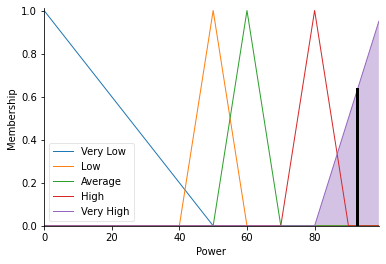

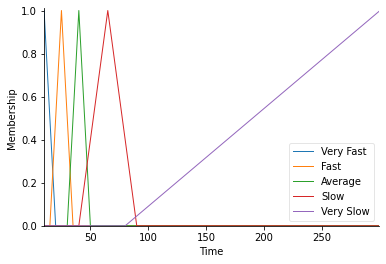

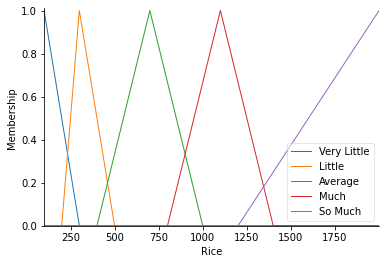

In [83]:
time_value = float(input("Enter time "))
rice_value = float(input("Enter Kg "))
powering.input['Time'] = time_value
powering.input['Rice'] = rice_value

powering.compute()
#xuất ra màn hình
print("mức năng lượng yêu cầu")
print(powering.output['Power'])

Power.view(sim = powering)
Time.view()
Rice.view() 